In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
# --- 1. Load Dataset and Initial Analysis ---
print("Loading the dataset...")
df = pd.read_csv('./dataset-churn5000.csv')
print("Dataset loaded successfully.")
print("-" * 40)

Loading the dataset...
Dataset loaded successfully.
----------------------------------------


In [29]:
# General information about the dataset
print("Initial DataFrame information:")
df.info()
print("-" * 40)

Initial DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClienteID           5000 non-null   int64  
 1   Edad                4750 non-null   float64
 2   Genero              5000 non-null   object 
 3   Antiguedad_meses    5000 non-null   int64  
 4   Uso_mensual_GB      4753 non-null   float64
 5   Plan                5000 non-null   object 
 6   Soporte_contactado  4750 non-null   float64
 7   Pago_puntual        5000 non-null   int64  
 8   Churn               5000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 351.7+ KB
----------------------------------------


In [30]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("-" * 40)

Missing values per column:
ClienteID               0
Edad                  250
Genero                  0
Antiguedad_meses        0
Uso_mensual_GB        247
Plan                    0
Soporte_contactado    250
Pago_puntual            0
Churn                   0
dtype: int64
----------------------------------------


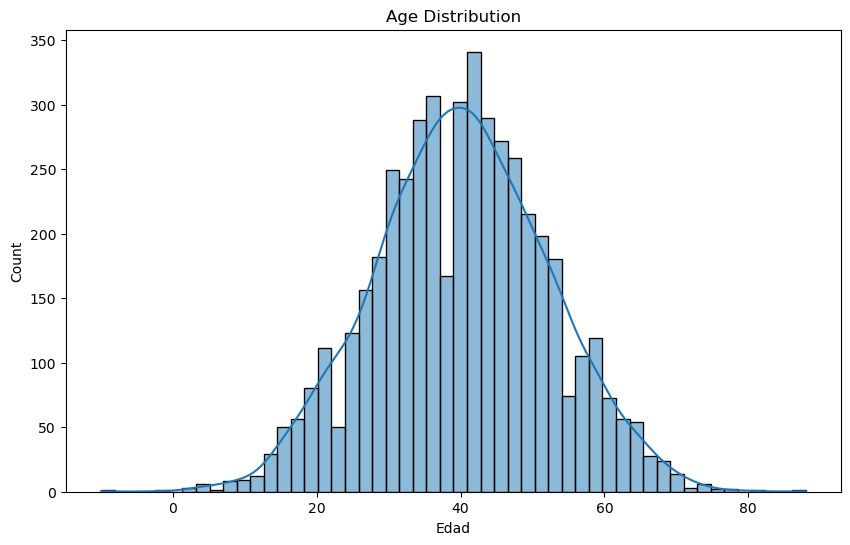

In [43]:
# Visualize the distribution of a column with missing values
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

In [45]:
# --- 2. Approach 1: Fill Missing Values with the Median ---
print("Applying the strategy: fill with the median...")
df_with_median = df.copy()
df_with_median['Edad'] = df_with_median['Edad'].fillna(df_with_median['Edad'].median())
df_with_median['Uso_mensual_GB'] = df_with_median['Uso_mensual_GB'].fillna(df_with_median['Uso_mensual_GB'].median())
df_with_median['Soporte_contactado'] = df_with_median['Soporte_contactado'].fillna(df_with_median['Soporte_contactado'].median())
print(df_with_median.isnull().sum())
print("-" * 40)

Applying the strategy: fill with the median...
ClienteID             0
Edad                  0
Genero                0
Antiguedad_meses      0
Uso_mensual_GB        0
Plan                  0
Soporte_contactado    0
Pago_puntual          0
Churn                 0
dtype: int64
----------------------------------------


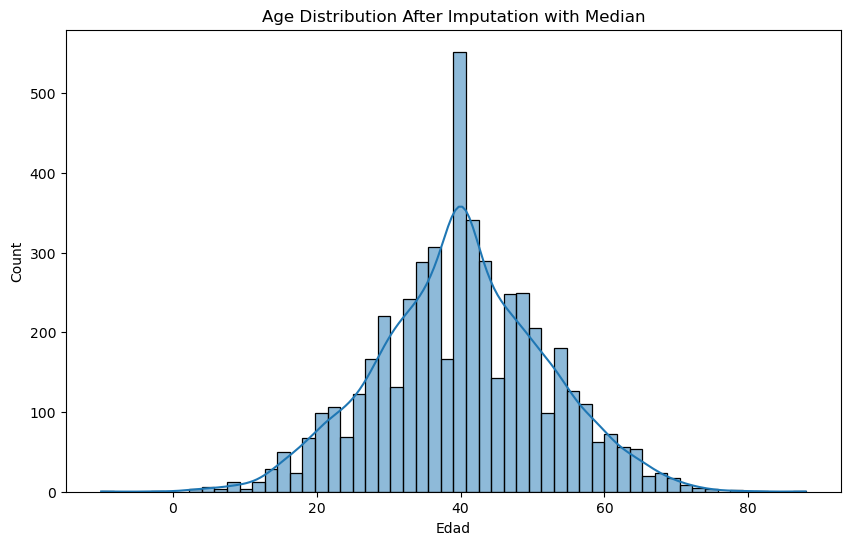

In [46]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_with_median['Edad'], kde=True)
plt.title('Age Distribution After Imputation with Median')
plt.show()

In [47]:
#Save the imputed dataset
df_with_median.to_csv('dataset_imputed_median.csv', index=False)
print("Dataset with median saved as 'dataset_imputed_median.csv'")
print("-" * 40)

Dataset with median saved as 'dataset_imputed_median.csv'
----------------------------------------


Applying the strategy: outlier removal with Z-score...


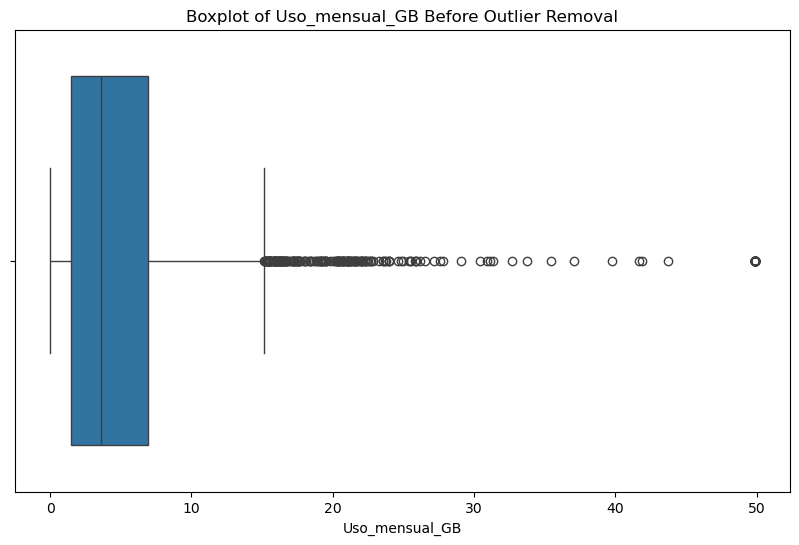

In [49]:
# --- 3. Outlier Detection and Removal with Z-score ---
print("Applying the strategy: outlier removal with Z-score...")
df_no_nans = df.dropna()
# Visualize the distribution of 'Uso_mensual_GB' before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_nans['Uso_mensual_GB'])
plt.title('Boxplot of Uso_mensual_GB Before Outlier Removal')
plt.show()

In [50]:
# Calculate Z-score for 'Uso_mensual_GB' and create a filter
z_scores = np.abs(zscore(df_no_nans['Uso_mensual_GB']))
df_no_outliers = df_no_nans[z_scores < 3]

In [51]:
# Verification of cleaning
print("Outlier removal verification:")
print(f"Original rows (without NaNs): {df_no_nans.shape[0]}")
print(f"Rows after outlier removal: {df_no_outliers.shape[0]}")
print(f"Number of outliers removed: {df_no_nans.shape[0] - df_no_outliers.shape[0]}")
print("-" * 40)

Outlier removal verification:
Original rows (without NaNs): 4286
Rows after outlier removal: 4220
Number of outliers removed: 66
----------------------------------------


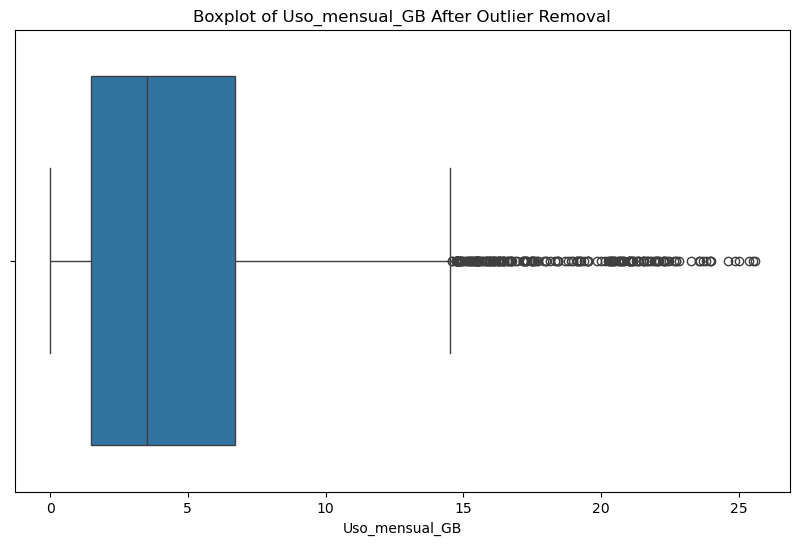

In [52]:
# Visualize the distribution after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Uso_mensual_GB'])
plt.title('Boxplot of Uso_mensual_GB After Outlier Removal')
plt.show()

In [53]:
#Save the dataset without outliers
df_no_outliers.to_csv('dataset_no_outliers.csv', index=False)
print("Dataset without outliers saved as 'dataset_no_outliers.csv'")
print("-" * 40)

Dataset without outliers saved as 'dataset_no_outliers.csv'
----------------------------------------
